In [1]:
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

import json
import matplotlib.pyplot as plt


### Representative similarity

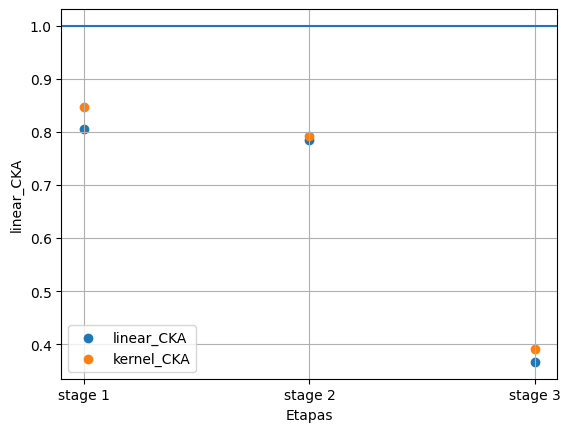

In [10]:
with open('sims.json') as archivo:
    datos = json.load(archivo)

# Extraemos los valores de linear_CKA y creamos una lista de etapas
linear = datos["linear_CKA"]; kernel = datos["kernel_CKA"]
etapas = ["stage 1", "stage 2", "stage 3"]


# Creamos el gráfico
plt.scatter(etapas, linear, label='linear_CKA')
plt.scatter(etapas, kernel, label='kernel_CKA')

# Agregamos la cuadrícula
plt.grid(True)
plt.legend()

# Etiquetamos los ejes
plt.xlabel('Etapas')
plt.ylabel('linear_CKA')

# Mostramos el gráfico
plt.axhline(1)
plt.show()



Esto es el cambio de las representaciones de la tarea 0 a la tarea 1.

- Aquí podemos ver que el ultimo stage cambia bastante, lo cual debe tener relación con que también cambia bastante el clasificador.
- Las primeras capas se mantienen quietas. Me pregunto, si con muchas tareas estas también no cambian mucho o siguen manteniendose.

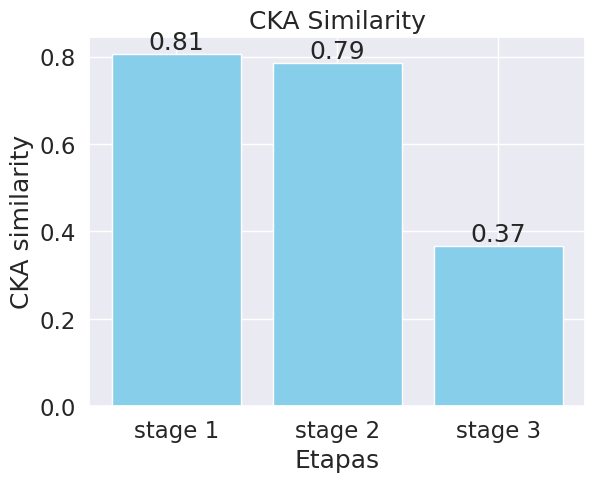

In [47]:
import json
import matplotlib.pyplot as plt

# Cargamos los datos desde el archivo JSON
with open('sims.json') as archivo:
    datos = json.load(archivo)

# Extraemos los valores de linear_CKA
linear = datos["linear_CKA"]
etapas = ["stage 1", "stage 2", "stage 3"]

# Creamos el gráfico de barras
plt.bar(etapas, linear, color='skyblue')
plt.grid(True)
plt.title('CKA Similarity')

# Etiquetamos los ejes
plt.xlabel('Etapas')
plt.ylabel('CKA similarity')

# Agregamos los valores exactos encima de cada barra
for i, valor in enumerate(linear):
    plt.text(i, valor, f'{valor:.2f}', ha='center', va='bottom')

# Mostramos el gráfico
plt.show()


### Acc (task 2)

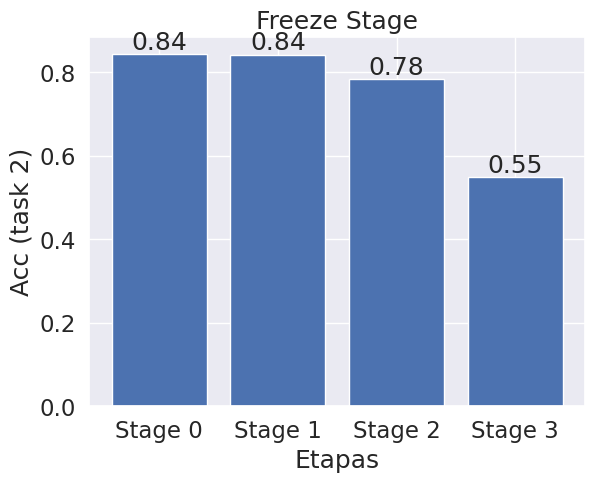

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Lista para almacenar las precisiones
precisiones = []

for i in range(4):
    pred = np.load(f'pred_task_1_stage_{i}.npy')
    target = np.load(f'target_task_1_stage_{i}.npy')

    # Filtrar las predicciones y los objetivos para clases de 5 a 9
    clases_interesantes = [5, 6, 7, 8, 9]

    pred_filtradas = pred[np.isin(target, clases_interesantes)]
    target_filtrados = target[np.isin(target, clases_interesantes)]

    # Calcular la precisión
    precision = np.mean(pred_filtradas == target_filtrados)
    precisiones.append(precision)

# Creamos el gráfico de barras
etapas = [f'Stage {i}' for i in range(4)]
plt.bar(etapas, precisiones)
plt.grid(True)
plt.title('Freeze Stage')

# Etiquetamos los ejes
plt.xlabel('Etapas')
plt.ylabel('Acc (task 2)')

# Agregar etiquetas con los valores exactos
for i, precision in enumerate(precisiones):
    plt.text(i, precision, f'{precision:.2f}', ha='center', va='bottom')

# Mostramos el gráfico
plt.show()


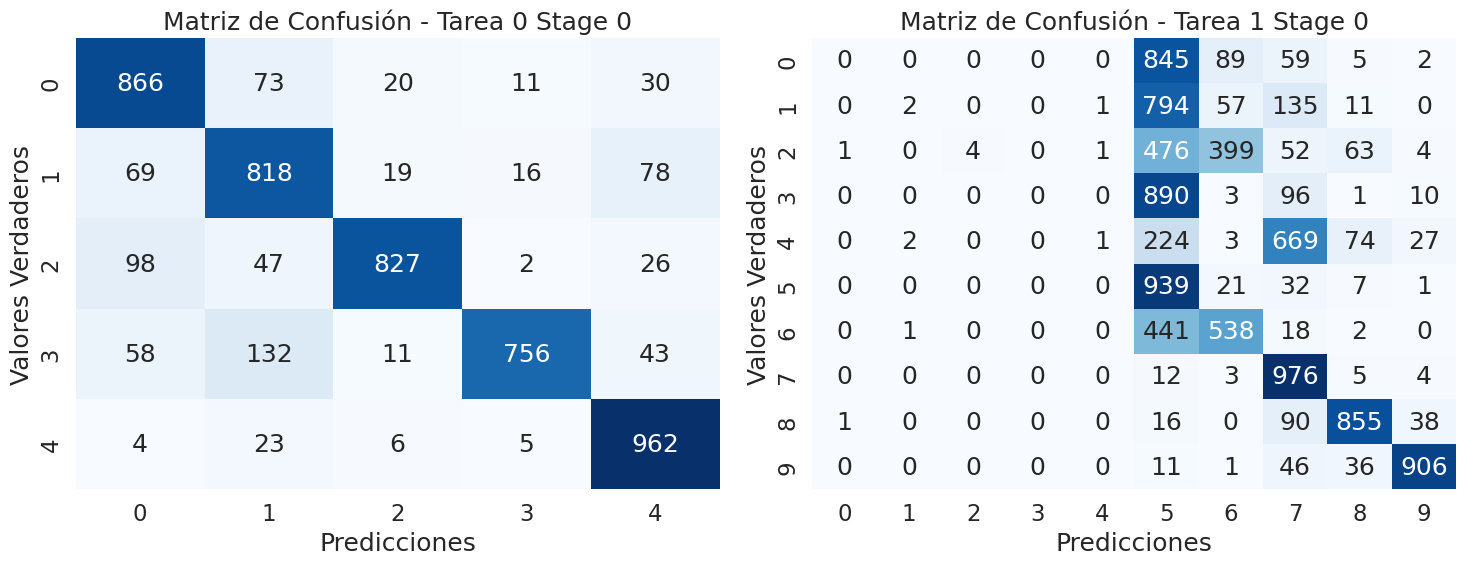

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Cargar los archivos .npy para la primera matriz de confusión
pred_task_0_stage_0 = np.load('pred_task_0_stage_0.npy')
target_task_0_stage_0 = np.load('target_task_0_stage_0.npy')

# Cargar los archivos .npy para la segunda matriz de confusión
pred_task_1_stage_0 = np.load('pred_task_1_stage_0.npy')
target_task_1_stage_0 = np.load('target_task_1_stage_0.npy')

# Configurar el estilo de la gráfica
plt.figure(figsize=(15, 6))

# Plotear la primera matriz de confusión
plt.subplot(1, 2, 1)
conf_matrix_task_0_stage_0 = confusion_matrix(target_task_0_stage_0, pred_task_0_stage_0)
sns.heatmap(conf_matrix_task_0_stage_0, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - Tarea 0 Stage 0')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')

# Plotear la segunda matriz de confusión
plt.subplot(1, 2, 2)
conf_matrix_task_1_stage_0 = confusion_matrix(target_task_1_stage_0, pred_task_1_stage_0)
sns.heatmap(conf_matrix_task_1_stage_0, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - Tarea 1 Stage 0')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')

plt.tight_layout()
plt.show()
